In [198]:
from flask import Flask, render_template 
import pandas as pd
import requests
from bs4 import BeautifulSoup 
from io import BytesIO
import base64
import matplotlib.pyplot as plt

In [148]:
url_get = requests.get('https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=30-12-2019')
soup = BeautifulSoup(url_get.content,"html.parser")

In [149]:
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [150]:
print(soup.prettify()[:1045])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://monexnews.com/" target="_self"/>
  <title>
   Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews
  </title>
  <meta content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " name="description"/>
  <meta content="Kurs yen, jpy, nilai tukar yen, monexnews" name="keywords"/>
  <meta content="favicon.jpg" property="og:image"/>
  <meta content="Ultimaengine.com" name="author"/>
  <meta content="follow, index" name="robots"/>
  <meta content="7 days" name="revisit-after"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="M7NOlgqcEadhl

## Cari table di www

<table class="table">
<tbody><tr>
<td>TANGGAL</td>
<td>ASK</td>
<td>BID</td>
</tr>
<tr class="verySoftGreyBg">
<td>14&nbsp;Mei&nbsp;2020</td>
<td>140,55</td>
<td>139,14</td>
</tr>


In [199]:
table = soup.find('table', attrs={'class':'table'})
print(table.prettify()[1:500])

table class="table">
 <tr>
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   30 Desember 2019
  </td>
  <td>
   128,30
  </td>
  <td>
   127,02
  </td>
 </tr>
 <tr>
  <td>
   27 Desember 2019
  </td>
  <td>
   128,11
  </td>
  <td>
   126,83
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   26 Desember 2019
  </td>
  <td>
   128,27
  </td>
  <td>
   126,98
  </td>
 </tr>
 <tr>
  <td>
   23 Desember 2019
  </td>
  <td>
   128,


In [200]:
tr = table.find_all('tr')

In [154]:
tr
print()

In [201]:
temp = [] 

In [202]:
for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #get tanggal 
    DATE = row.find_all('td')[0].text
    DATE =  DATE.strip() #for removing the excess whitespace
    
    #get inflasi
    ASK = row.find_all('td')[1].text
    ASK = ASK.strip() #for removing the excess whitespace

    #get inflasi
    BID = row.find_all('td')[2].text
    BID = BID.strip() #for removing the excess whitespace
    
    temp.append((DATE,ASK,BID)) 

AttributeError: 'list' object has no attribute 'head'

In [156]:
temp
print()

In [203]:
import pandas as pd
df = pd.DataFrame(temp, columns = ('Date','Ask','Bid'))


In [204]:
df 

,Date,Ask,Bid
0,30 Desember 2019,"128,30","127,02"
1,27 Desember 2019,"128,11","126,83"
2,26 Desember 2019,"128,27","126,98"
3,23 Desember 2019,"128,39","127,10"
4,20 Desember 2019,"128,63","127,34"
...,...,...,...
240,08 Januari 2019,"129,84","128,52"
241,07 Januari 2019,"130,86","129,51"
242,04 Januari 2019,"133,51","132,17"
243,03 Januari 2019,"135,44","134,08"


In [205]:
df['Date']=df['Date'].str.replace("Mei","May")
df['Date']=df['Date'].str.replace("Januari","Jan")
df['Date']=df['Date'].str.replace("Februari","Feb")
df['Date']=df['Date'].str.replace("Maret","Mar")
df['Date']=df['Date'].str.replace("April","Apr")
df['Date']=df['Date'].str.replace("Juni","Jun")
df['Date']=df['Date'].str.replace("Juli","Jul")
df['Date']=df['Date'].str.replace("Agustus","Aug")
df['Date']=df['Date'].str.replace("September","Sep")
df['Date']=df['Date'].str.replace("Oktober","Oct")
df['Date']=df['Date'].str.replace("November","Nov")
df['Date']=df['Date'].str.replace("Desember","Dec")

In [206]:
df['Ask'] = df['Ask'].str.replace(",",".")
df['Bid'] = df['Bid'].str.replace(",",".")

In [207]:
df['Ask']=df['Ask'].astype('float')
df['Bid']=df['Bid'].astype('float')

In [170]:
df['Date']

0     2019-01-02
1     2019-01-03
2     2019-01-04
3     2019-01-07
4     2019-01-08
         ...    
221   2019-11-25
222   2019-11-26
223   2019-11-27
224   2019-11-28
225   2019-11-29
Name: Date, Length: 226, dtype: datetime64[ns]

In [208]:
df['Date']=df['Date'].astype('datetime64')

In [209]:
df.dtypes

Date    datetime64[ns]
Ask            float64
Bid            float64
dtype: object

In [210]:
df = df.sort_values(by='Date').set_index('Date')

In [211]:
df

,Ask,Bid
Date,,
2019-01-02,132.89,131.54
2019-01-03,135.44,134.08
2019-01-04,133.51,132.17
2019-01-07,130.86,129.51
2019-01-08,129.84,128.52
...,...,...
2019-12-20,128.63,127.34
2019-12-23,128.39,127.10
2019-12-26,128.27,126.98


In [212]:
df = df.resample('M').mean()

In [183]:
#df = df.reset_index()

In [213]:
df

,Ask,Bid
Date,,
2019-01-31,130.750000,129.421818
2019-02-28,127.862632,126.571053
2019-03-31,128.524500,127.218000
2019-04-30,127.367368,126.071053
2019-05-31,131.472857,130.135238
2019-06-30,132.400667,131.046000
2019-07-31,130.464348,129.133043
2019-08-31,134.737727,133.372273
2019-09-30,132.008571,130.663810


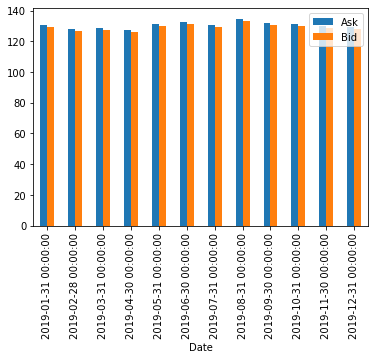

In [214]:
df.plot(kind ='bar')